# Introduction in Chinese
-------------------------------------

物种分布模型（Species Distribution Models，简称SDMs）是一种用于预测物种在特定环境条件下出现概率的生态学工具。这些模型通过分析物种出现地点的地理和环境数据，来预测物种的潜在分布范围。
物种分布模型在定量生态学中非常流行，并且是全球变化影响评估中用于预测物种潜在范围变化的最广泛使用的建模框架。

物种分布模型的输入通常包括地理参考的生物多样性观测数据（例如个体位置、物种存在、物种计数、物种丰富度；响应或因变量）和环境信息的地理图层（例如气候、土地覆盖、土壤属性；预测或自变量）。这些信息现在广泛以数字化格式提供。例如，在线存储库提供有关物种分布的数据（例如GBIF和OBIS）、有关单个动物位置的数据（例如Movebank）、有关气候的数据（例如WorldClim和CHELSA）以及土地覆盖和其他遥感产品的数据（例如Copernicus）。

物种分布模型的目的是将特定地点的生物多样性观测与这些地点的特定环境条件联系起来，可以使用不同的统计和机器学习算法来实现这一点。一旦估计了生物多样性-环境关系，我们可以通过将模型投影到可用的环境图层上，在空间和时间上进行预测。


In [4]:
import pandas as pd
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



假设你已经有了一个包含物种出现数据的地理空间数据集
这个数据集至少包含两列：物种是否存在（1表示存在，0表示不存在）和地理坐标

为了示例，我们创建一个假的数据集
假设我们有两个环境变量：温度和降水，以及物种出现的数据


In [5]:
data = pd.DataFrame({
    'species_presence': [1, 0, 1, 0, 1],  # 物种出现（1）或不存在（0）
    'temperature': [22, 15, 30, 18, 25],  # 温度
    'precipitation': [1200, 800, 1500, 900, 1300]  # 降水量
})


为数据增加地理坐标，将数据转换为GeoDataFrame。这里我们使用假的地理坐标


In [7]:
from shapely import Point
data['geometry'] = pd.Series([
    Point(-97.73, 30.27),
    Point(-97.74, 30.29),
    Point(-97.72, 30.28),
    Point(-97.75, 30.26),
    Point(-97.76, 30.30),
], index=data.index)


In [10]:
gdf = gpd.GeoDataFrame(data, geometry='geometry')
gdf

,species_presence,temperature,precipitation,geometry
0,1,22,1200,POINT (-97.73000 30.27000)
1,0,15,800,POINT (-97.74000 30.29000)
2,1,30,1500,POINT (-97.72000 30.28000)
3,0,18,900,POINT (-97.75000 30.26000)
4,1,25,1300,POINT (-97.76000 30.30000)


划分训练集和测试集

In [11]:
X = gdf[['temperature', 'precipitation']]
y = gdf['species_presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

使用随机森林分类器作为模型

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# 预测测试集
y_pred = model.predict(X_test)

In [16]:
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

d:\music\venv\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [17]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Confusion Matrix:
[[1]]


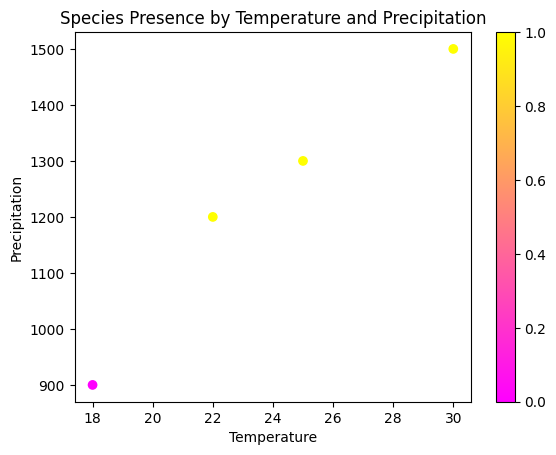

In [22]:
# 可视化结果（可选）
# 这里我们简化了可视化，只展示训练数据点
plt.scatter(X_train['temperature'], X_train['precipitation'], c=y_train, cmap='spring')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('Species Presence by Temperature and Precipitation')
plt.colorbar()
plt.show()

In [21]:
X_train['temperature'], X_train['precipitation'], y_train

(4    25
 2    30
 0    22
 3    18
 Name: temperature, dtype: int64,
 4    1300
 2    1500
 0    1200
 3     900
 Name: precipitation, dtype: int64,
 4    1
 2    1
 0    1
 3    0
 Name: species_presence, dtype: int64)